# Credit Card Users Churn Prediction Project by Abimbola Salami


### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

### Datasets:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


### Importing Relevant Libraries

In [1]:
# pip install nb-black

In [2]:
# Library to read and manipulate data
import pandas as pd
import numpy as np

# Library for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Library for missing value imputation
from sklearn.impute import SimpleImputer

# Library for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Library for getting different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# Library for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Library for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Library for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library for defining maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# Library for supressing scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library for supressing warnings
import warnings

warnings.filterwarnings("ignore")

# Library for making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

#### Loading the dataset

In [3]:
data = pd.read_csv("BankChurners.csv")

ccData = data.copy()  # copying data to another varaible

ccData.head(10)  # viewing first 10 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


<IPython.core.display.Javascript object>

In [4]:
(
    rows_count,
    columns_count,
) = ccData.shape  # Getting the number of rows and columns of the dataset
print("Total Number of rows :", rows_count)
print("Total Number of columns :", columns_count)

Total Number of rows : 10127
Total Number of columns : 21


<IPython.core.display.Javascript object>

**Observation**
- There are 10127 rows and 21 columns
- The Customer ID CLIENTNUM is not required and will be dropped from the dataset.
- The dependent variable is Attrition_Flag.
- There are null values in the dataset which will require treatment

### Exploratory Data Analysis

#### Checking for duplicates

In [5]:
ccData[ccData.duplicated()].count()  # to check for duplicates

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

- There are no duplicates in the dataset

#### Identifying the datatypes and nulls in the dataset

In [6]:
ccData.info()  # identify non nulls and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             8608 non-null object
Marital_Status              9378 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64

<IPython.core.display.Javascript object>

**Observation**
- The data-types consist of int64, float64 and object
- Education_Level & Marital_Status contains missing values which will require treatment
- All object datatypes will be converted to categorical variables

In [7]:
ccData.nunique()  # checking the number of unique values in data

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
ccData.isnull().sum().sort_values(
    ascending=False
)  # checking the number of missing values in each column

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Months_on_book                 0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Total_Relationship_Count       0
Total_Ct_Chng_Q4_Q1            0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
CLIENTNUM                      0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
ccData.isnull().sum() / ccData.shape[
    0
] * 100  # percentage of null values for each variable

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.396
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
ccData.describe().round(0).T  # summary statistics for the variables

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.000,36903783.000,708082083.000,713036770.000,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.000,8.000,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.000,1.000,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,36.000,8.000,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,4.000,2.000,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.000,1.000,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.000,1.000,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8632.000,9089.000,1438.000,2555.000,4549.000,11068.000,34516.000
Total_Revolving_Bal,10127.000,1163.000,815.000,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.000,9091.000,3.000,1324.000,3474.000,9859.000,34516.000


<IPython.core.display.Javascript object>

**Observations**
- The average age of  the customers is 46years old with the ages ranging from 26 to 73years old.
- The average number of depedent is 2 with the number of dependents ranging from 0 to 5.
- The average period the customers have spent with the bank is 36 months with the period ranging from 13 to 56 months.
- The average number of products held by the customers is 4.
- The average number of months with inactivity in the last 12 months is 2 months with inactivity ranging from 0 to 6 months.
- The average number of contacts in the last 12 months is 2.
- The average credit limit on the credit card is 8,632 ranging from 1,438 to 34,516.


## Data Preprocessing

In [11]:
cols = ccData.select_dtypes(["object"])  # Getting all object datatypes
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
for i in cols.columns:  # converting to object datatypes to category datatypes
    ccData[i] = ccData[i].astype("category")

<IPython.core.display.Javascript object>

In [13]:
cols_cat = ccData.select_dtypes(["category"])  # Assigning the category variables

<IPython.core.display.Javascript object>

In [14]:
for i in cols_cat.columns:  # Getting the unique values for each categorical variable
    print("Unique values in", i, "are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

<IPython.core.display.Javascript object>

Income_Category contains 'abc' which should be treated

In [15]:
ccData.drop(["CLIENTNUM"], axis=1, inplace=True)  # dropping CLIENTNUM column

<IPython.core.display.Javascript object>

#### Assigning 0 and 1 to values in the Attrition_Flag

In [16]:
ccData["Attrition_Flag"] = ccData["Attrition_Flag"].apply(
    lambda x: 0 if x == "Existing Customer" else x
)  # Winsorize

ccData["Attrition_Flag"] = ccData["Attrition_Flag"].apply(
    lambda x: 1 if x == "Attrited Customer" else x
)

ccData.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [17]:
ccData[
    "Attrition_Flag"
].value_counts()  # Getting the unique values of the Attrition_Flag

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

- The number of Attrited customers is significantly smaller than existing customers.

### Univariate Analysis

In [18]:
ccData.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
num_cols = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

<IPython.core.display.Javascript object>

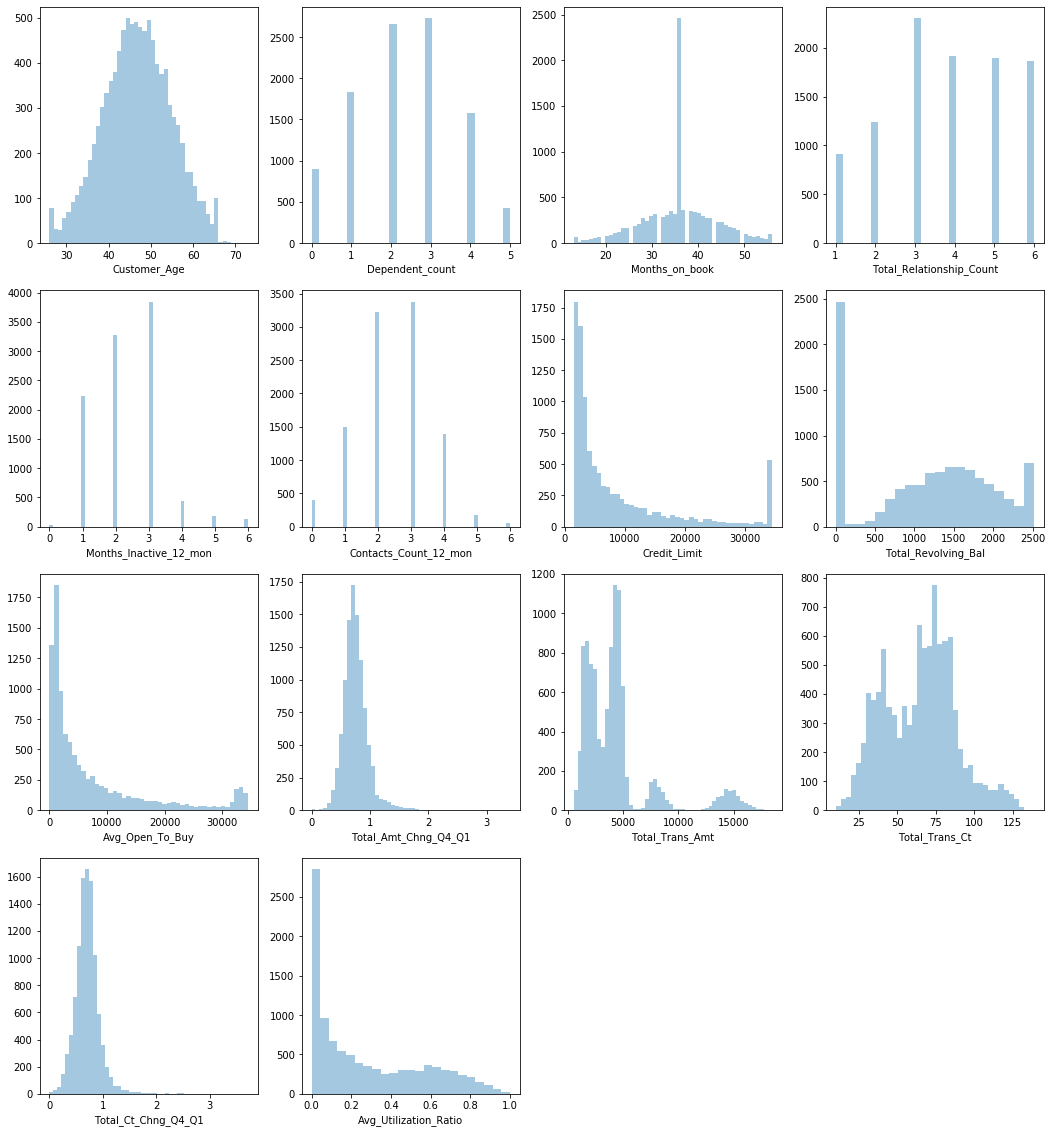

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(18, 20))

pos = 1

for i in num_cols:

    plt.subplot(4, 4, pos)

    sns.distplot(ccData[i], kde=False)

    pos += 1

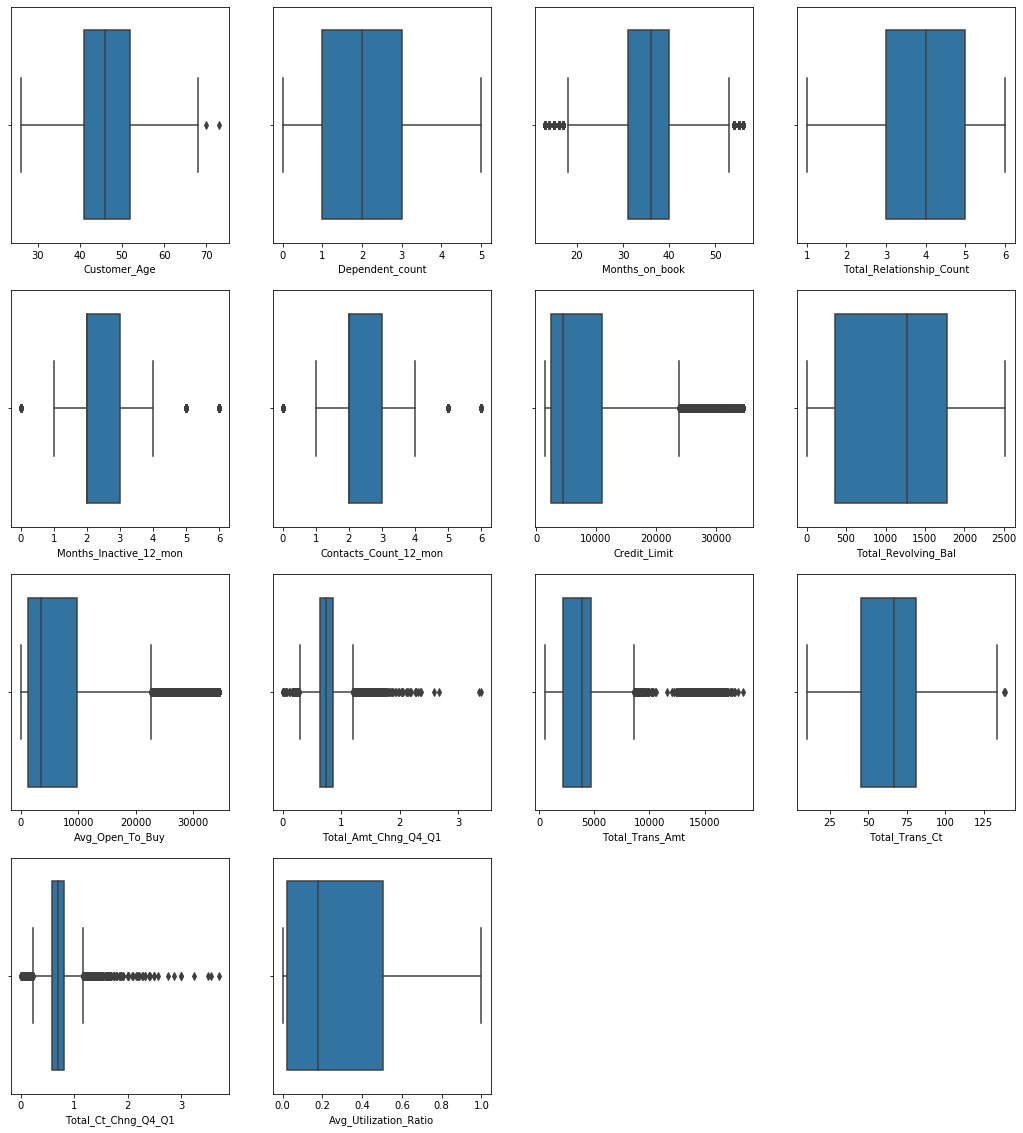

<IPython.core.display.Javascript object>

In [21]:
# --Checking Outliers

# -----------------------------Plot Outliers using Box plot------------------------------------
plt.figure(figsize=(18, 20))

pos = 1

for i in num_cols:

    plt.subplot(4, 4, pos)

    sns.boxplot(ccData[i])

    pos += 1

- 'Customer_Age', 'Months_on_book', 'Total_Revolving_Bal' and 'Total_Trans_Ct' are normally distributed
- 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1' and 'Avg_Utilization_Ratio' are right skewed

In [22]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Plotting univariate analysis on the category variables

In [23]:
cols_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

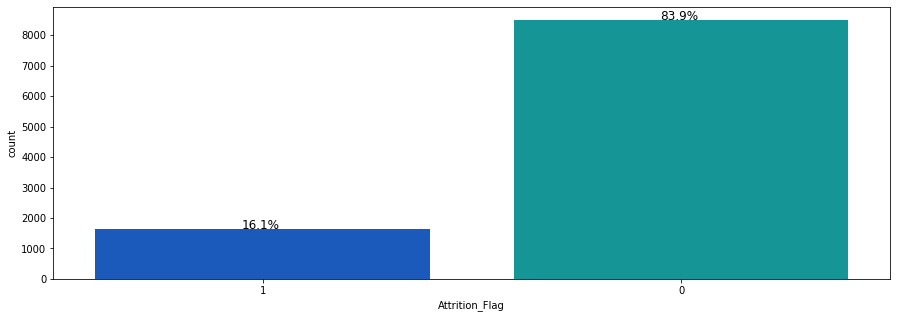

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Attrition_Flag"], palette="winter")
perc_on_bar(ax, ccData["Attrition_Flag"])

- There are more existing customers than attrited customers in the dataset

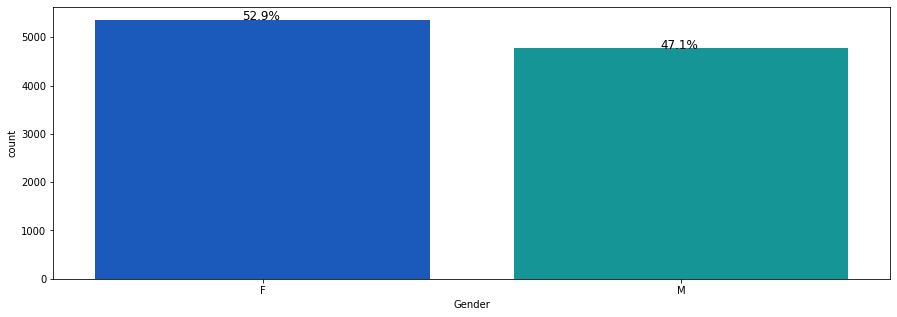

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Gender"], palette="winter")
perc_on_bar(ax, ccData["Gender"])

- There are slightly more females than males

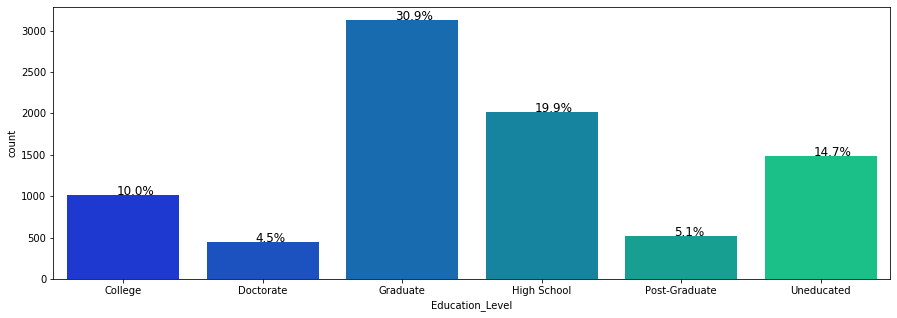

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Education_Level"], palette="winter")
perc_on_bar(ax, ccData["Education_Level"])

- Most of the customers are Graduates

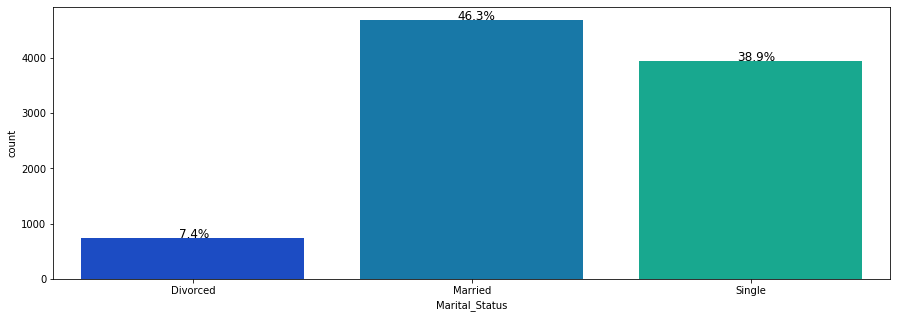

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Marital_Status"], palette="winter")
perc_on_bar(ax, ccData["Marital_Status"])

- Most of the customers are married

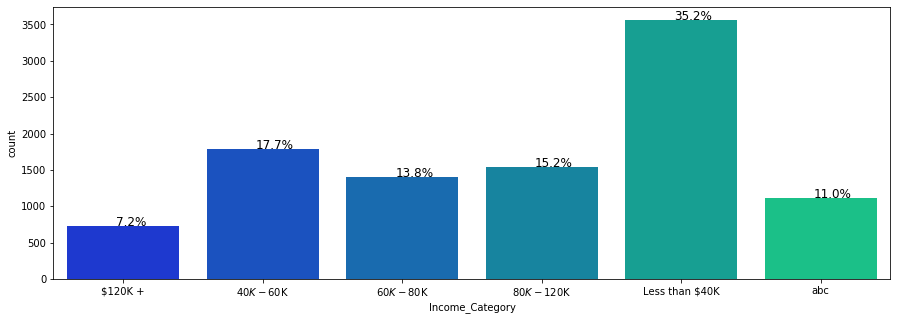

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Income_Category"], palette="winter")
perc_on_bar(ax, ccData["Income_Category"])

- Most of the customers earn less than $40K

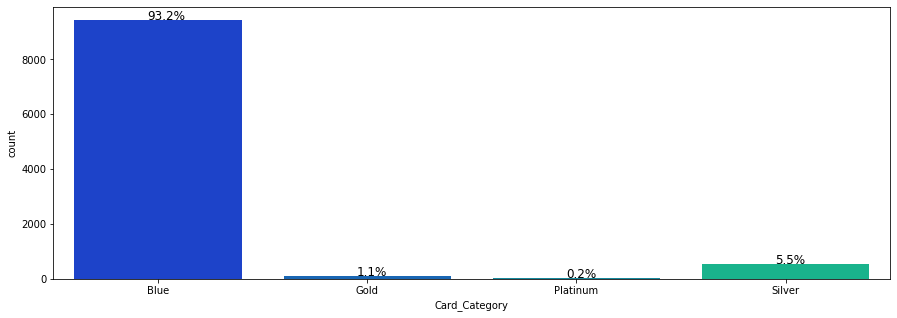

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(ccData["Card_Category"], palette="winter")
perc_on_bar(ax, ccData["Card_Category"])

- Most of the customers are on the Blue Card category

## Bivariate Analysis and Multivariate Analysis

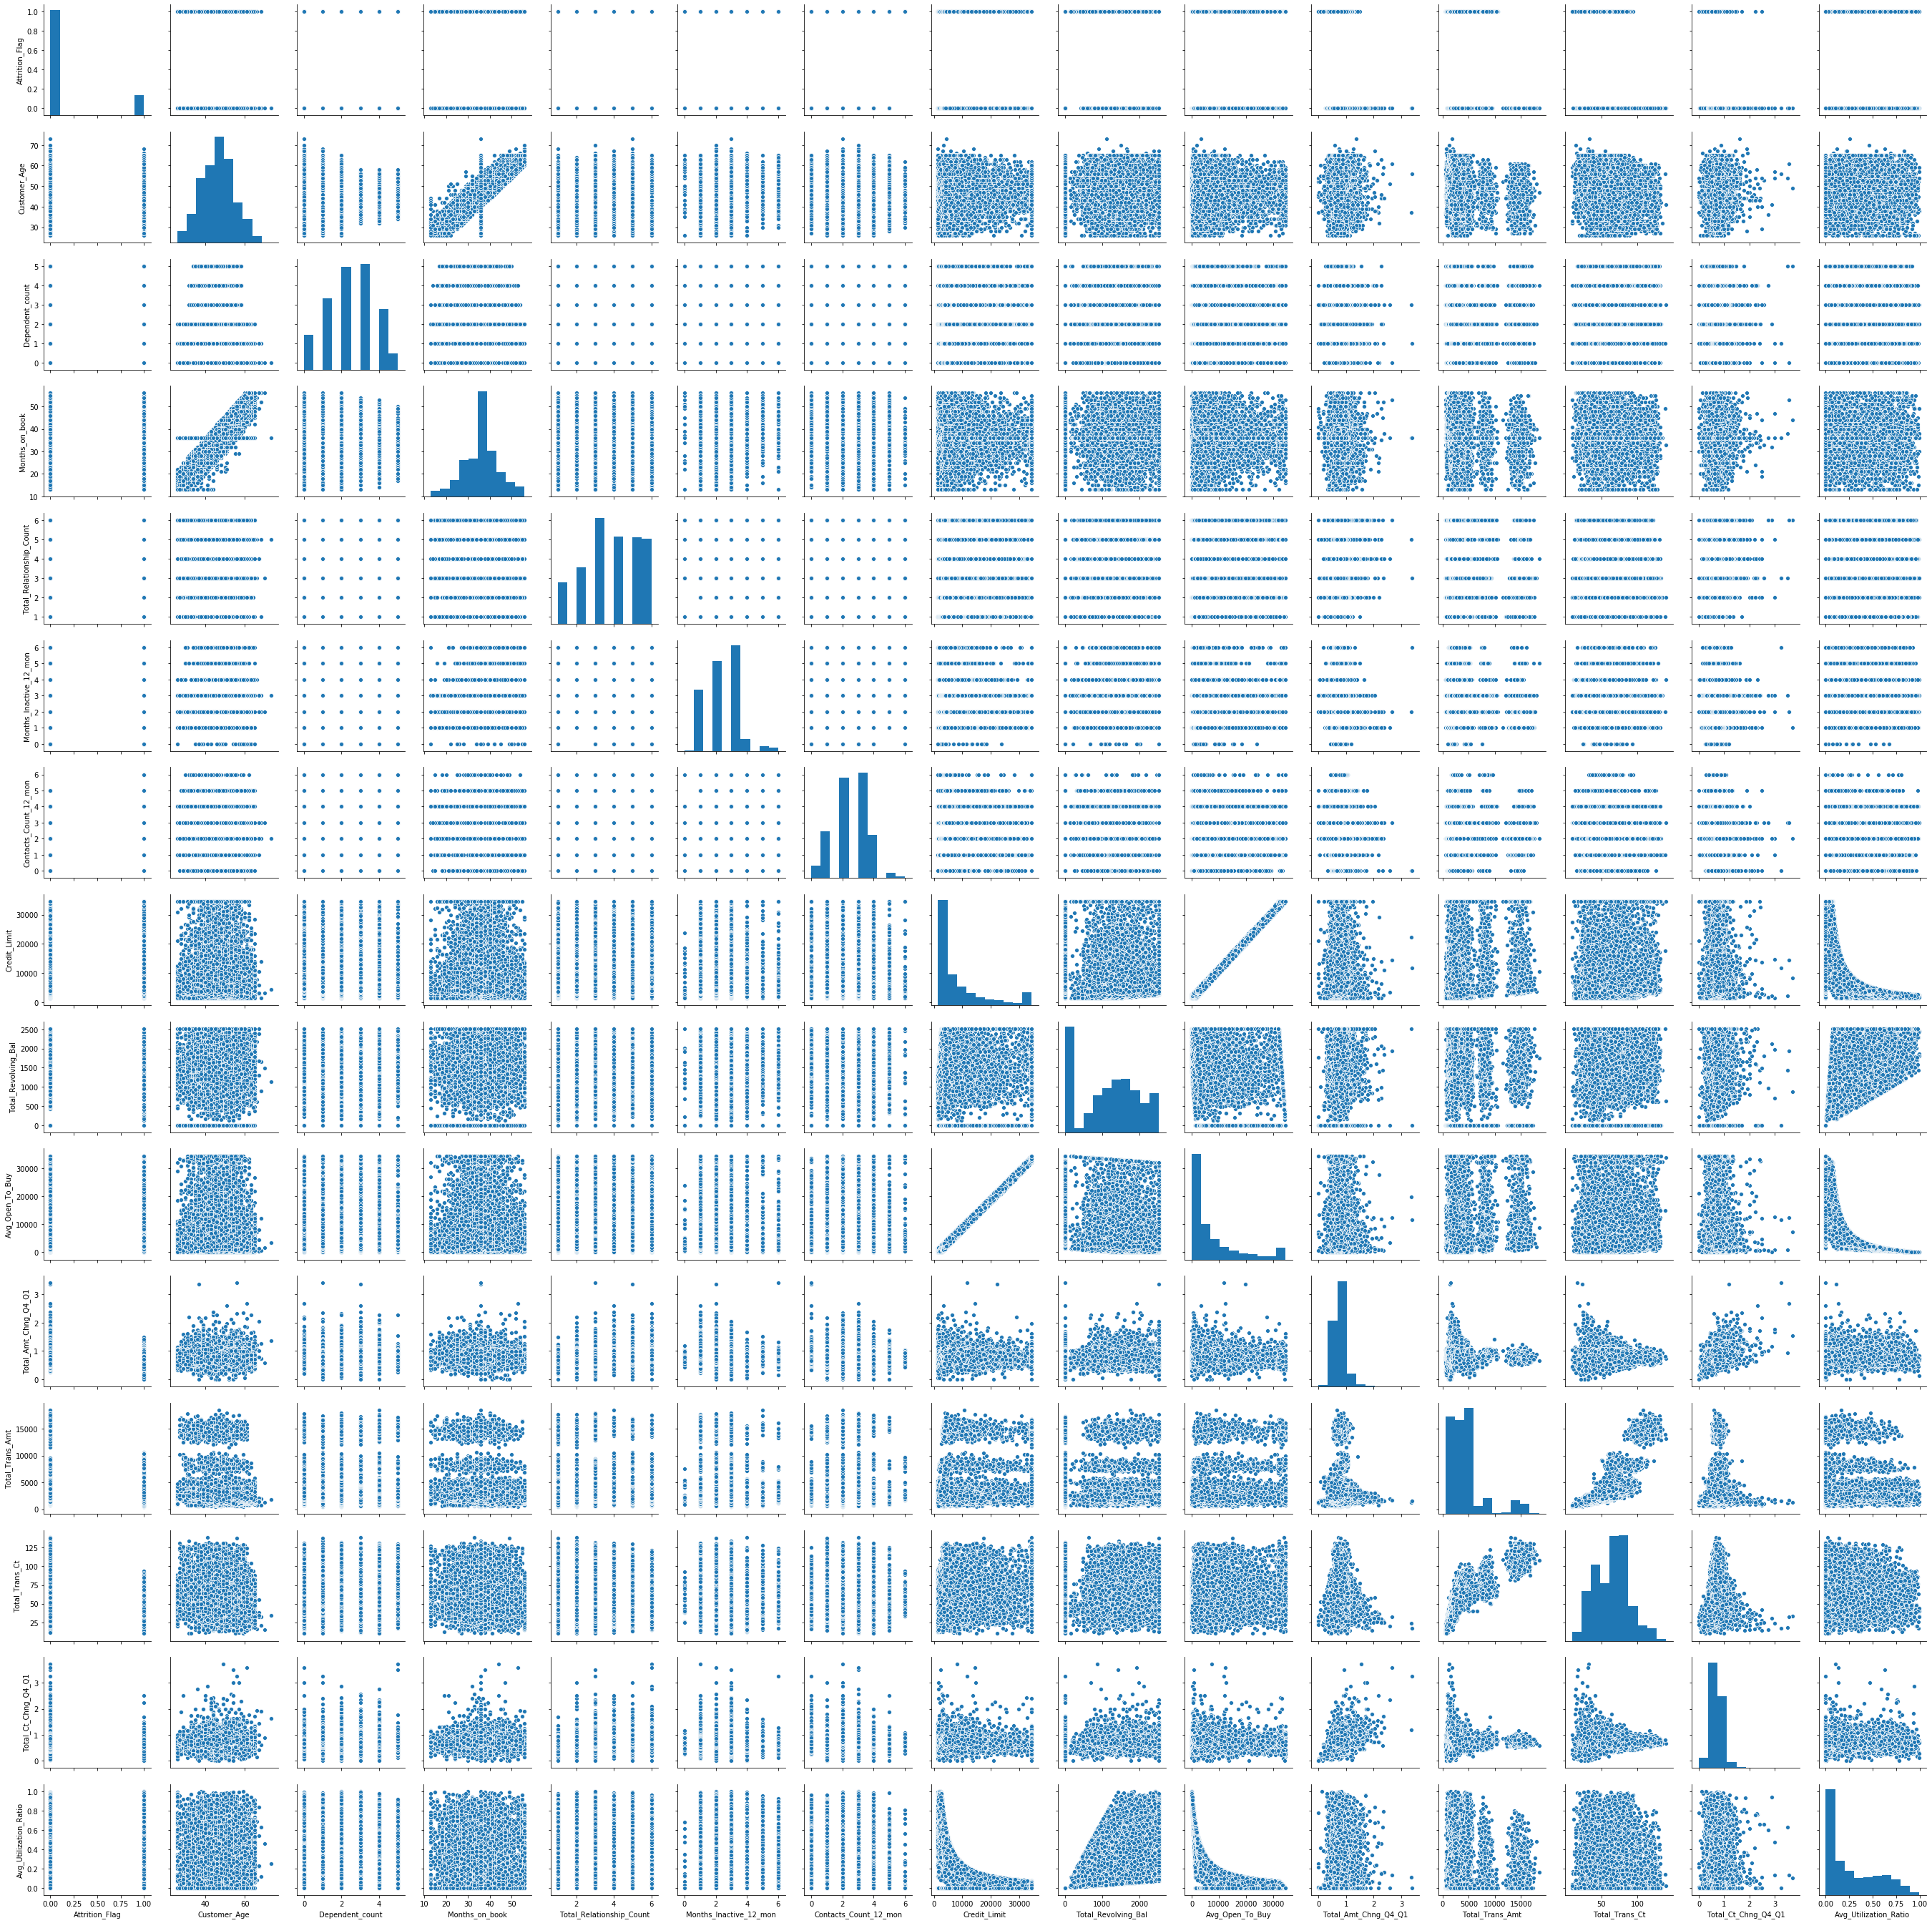

<IPython.core.display.Javascript object>

In [30]:
sns.pairplot(ccData)
# Checking the relationship between the numerical variables using pairplot

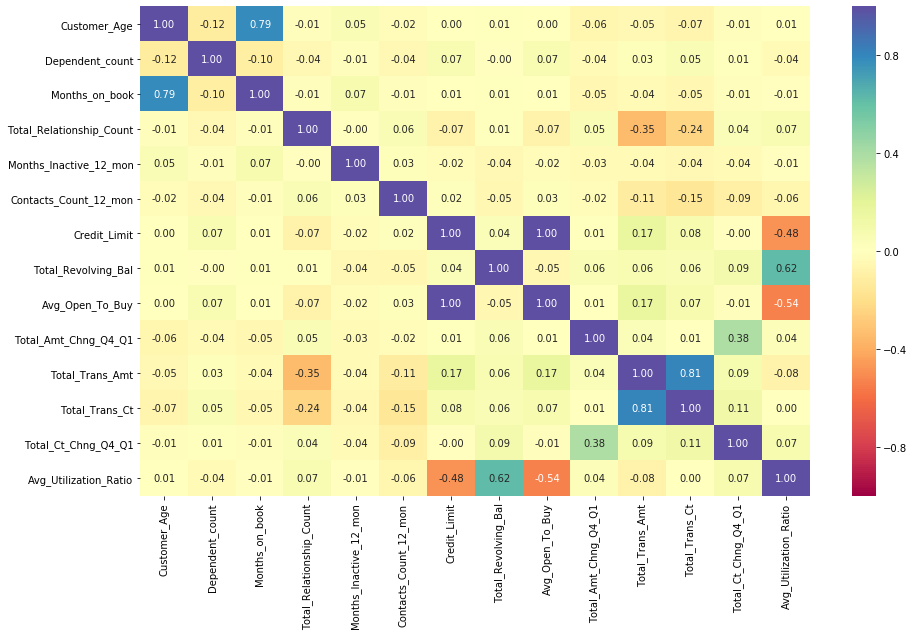

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 9))

sns.heatmap(
    ccData[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Avg_Open_To_Buy and Credit_Limit are highly positively correlated
- Months_on_book and Customer_Age are moderately correlated
- Avg_Utilization_Ratio, Total_Revolving_Bal and Avg_Open_To_Buy are moderately correlated

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [33]:
ccData.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Plotting the dependent variable "Attrition_Flag" against the other categorical variables

Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


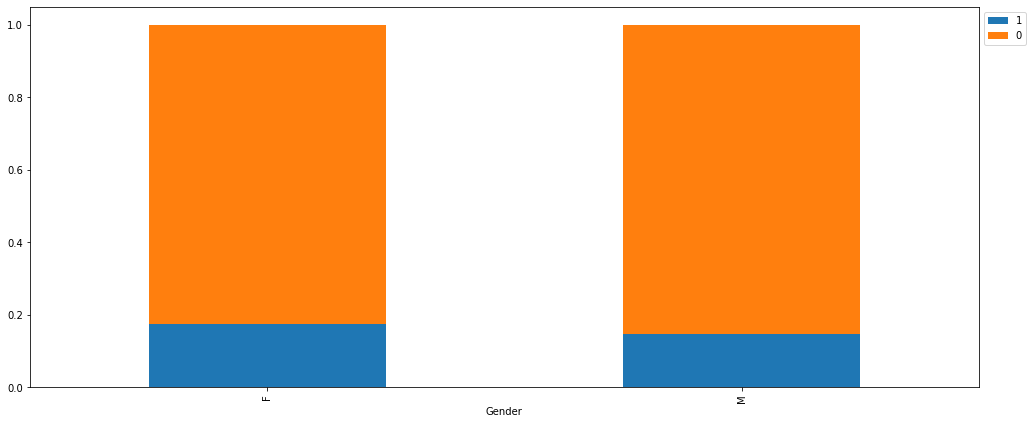

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(ccData, "Gender", "Attrition_Flag")

- There is a higher attrition rate among the female customers

Attrition_Flag      1     0   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------------------------------------------------------------------------------------------------


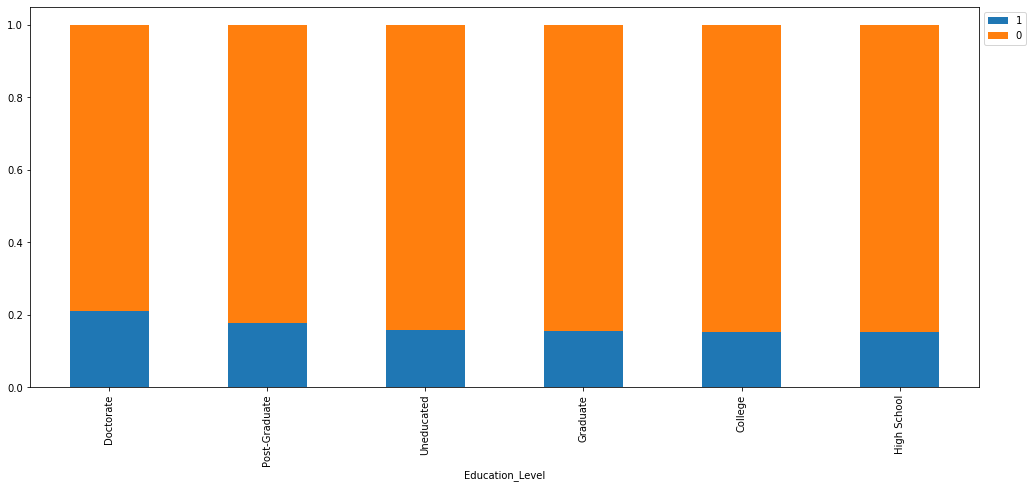

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(ccData, "Education_Level", "Attrition_Flag")

- There is higher attrition rate among Doctorate than other Education Levels

Attrition_Flag     1     0   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------------------------------------------------------------------------------------------------


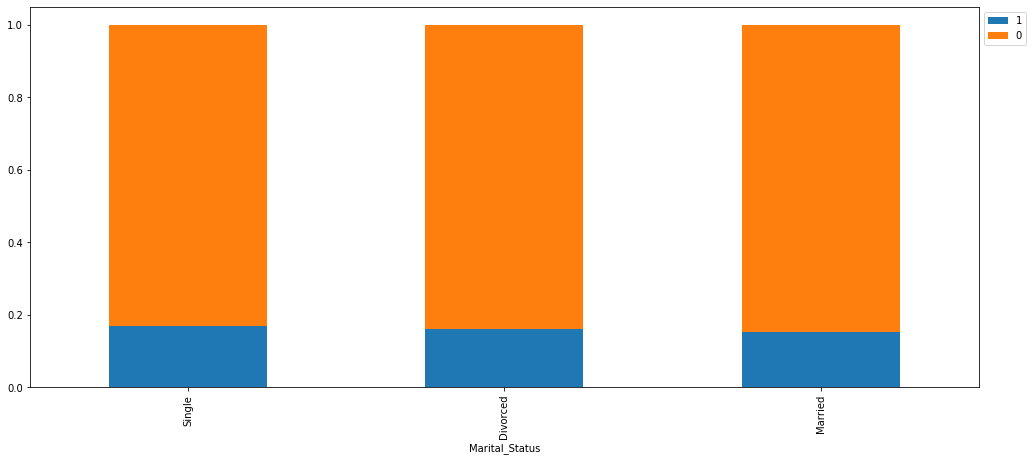

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(ccData, "Marital_Status", "Attrition_Flag")

- There is slightly higher attrition rate among the Singles

Attrition_Flag      1     0    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
abc               187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


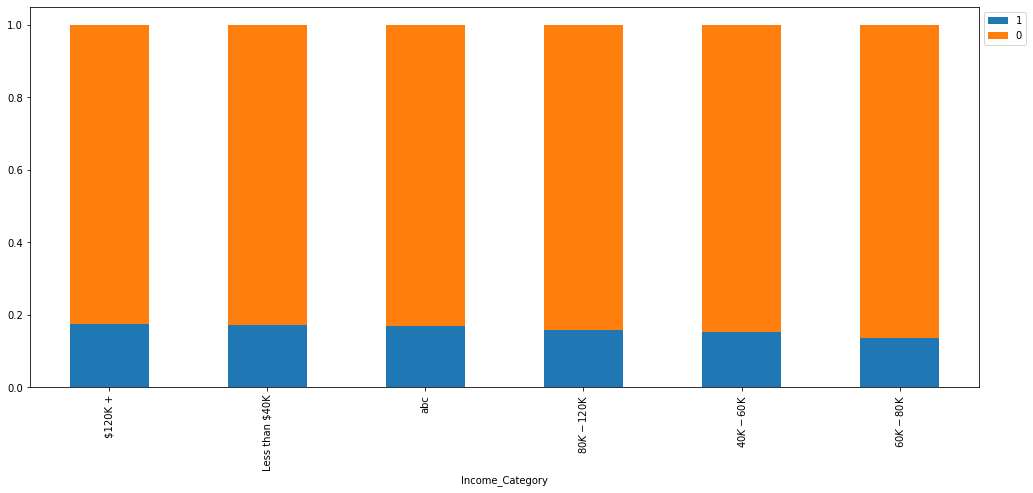

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(ccData, "Income_Category", "Attrition_Flag")

- There is slightly higher attrition rate among customers earning more than $120K and less thank 40K

Attrition_Flag     1     0    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


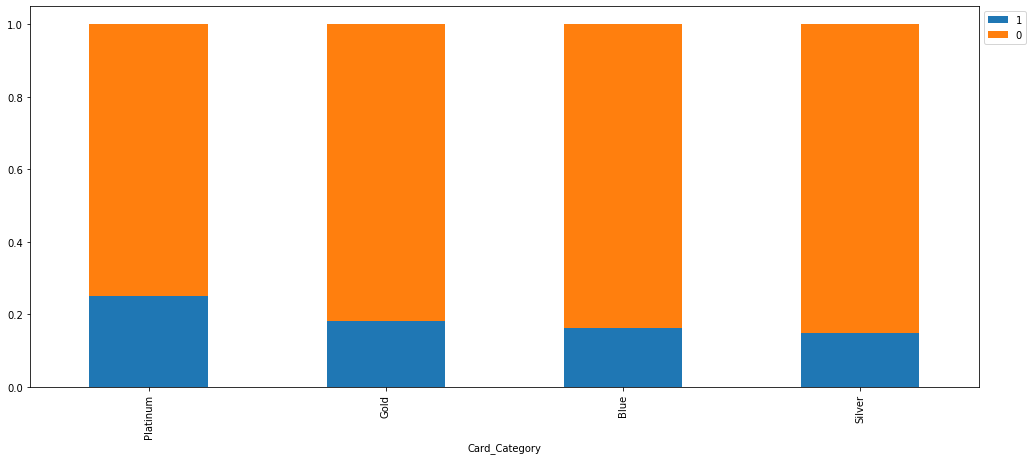

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(ccData, "Card_Category", "Attrition_Flag")

- There is a higher attrition rate among the Platinum card holders than the other Card categories

In [39]:
# To impute missing values
from sklearn.impute import KNNImputer

<IPython.core.display.Javascript object>

In [40]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [41]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["Gender", "Marital_Status", "Education_Level", "Income_Category"]

<IPython.core.display.Javascript object>

In [42]:
ccData[reqd_col_for_impute].head()

,Gender,Marital_Status,Education_Level,Income_Category
0,M,Married,High School,$60K - $80K
1,F,Single,Graduate,Less than $40K
2,M,Married,Graduate,$80K - $120K
3,F,NaN,High School,Less than $40K
4,M,Married,Uneducated,$60K - $80K


<IPython.core.display.Javascript object>

In [43]:
# Declaring numerical values for each categorical column for KNN imputation
Gender = {"M": 0, "F": 1}
ccData["Gender"] = ccData["Gender"].map(Gender)

Marital_Status = {"Single": 0, "Divorced": 1, "Married": 2}
ccData["Marital_Status"] = ccData["Marital_Status"].map(Marital_Status)

Education_Level = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
ccData["Education_Level"] = ccData["Education_Level"].map(Education_Level)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$80K - $120K": 2,
    "$60K - $80K": 3,
    "$120K +": 4,
}
ccData["Income_Category"] = ccData["Income_Category"].map(Income_Category)

<IPython.core.display.Javascript object>

In [44]:
# Separating target variable and other variables
X = ccData.drop(columns="Attrition_Flag", axis=1)

y = ccData["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [45]:
# Fit and transform the X data
X[reqd_col_for_impute] = imputer.fit_transform(X[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [46]:
# Checking if any column has missing values
print(X.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


<IPython.core.display.Javascript object>

In [47]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X[y] = np.round(X[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [48]:
inverse_mapping(Gender, "Gender")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Income_Category, "Income_Category")

<IPython.core.display.Javascript object>

In [49]:
cols = X.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X[i].value_counts())
    print("*" * 30)

F    5358
M    4769
Name: Gender, dtype: int64
******************************
Graduate         3775
High School      2402
College          1496
Uneducated       1487
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
******************************
Married     4786
Single      4049
Divorced    1292
Name: Marital_Status, dtype: int64
******************************
Less than $40K    4534
$40K - $60K       1880
$80K - $120K      1572
$60K - $80K       1414
$120K +            727
Name: Income_Category, dtype: int64
******************************
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

#### Creating Dummy Variables

In [50]:
X = pd.get_dummies(X, drop_first=True)

print(X.shape)

(10127, 29)


<IPython.core.display.Javascript object>

In [51]:
# Splitting data into training, validation and test set:
# first we split data into temporary and test data

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

In [52]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("lr", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

print("\n" "F1 Score Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 79.60962846677133
Random forest: 75.71323914181058
GBM: 81.65620094191523
Adaboost: 81.65463108320252
Xgboost: 86.67870225013083
dtree: 77.5614861329147
lr: 42.71847200418629

Validation Performance:

Bagging: 0.7883435582822086
Random forest: 0.8128834355828221
GBM: 0.8650306748466258
Adaboost: 0.8588957055214724
Xgboost: 0.8773006134969326
dtree: 0.8098159509202454
lr: 0.5398773006134969

F1 Score Performance:

Bagging: 0.8344155844155845
Random forest: 0.8717105263157895
GBM: 0.9009584664536742
Adaboost: 0.8736349453978159
Xgboost: 0.89937106918239
dtree: 0.8098159509202454
lr: 0.619718309859155


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### Model can make wrong predictions as follows:

- False Positive: Where a customer is not going to close his credit card account and the model predicts that the customer is going to close his credit card account leading to waste of resources by the bank.

- False Negative: Where a customer is going to close his credit card account and the model predicts that the customer is not going to close his credit card account leading to the bank missing the opportunity to market such customer and encourage them to keep using the account.

#### Which case is more important?
- How to reduce this loss i.e need to reduce False Negatives?
- Recall should be maximized, the greater the Recall, the higher the chances of decreasing the false negatives.

### Hypertuning

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Adaboost

In [56]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8555049712192568:
Wall time: 2min 29s


<IPython.core.display.Javascript object>

In [57]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [58]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997,0.987,0.995,0.991


<IPython.core.display.Javascript object>

In [59]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.877,0.908,0.892


<IPython.core.display.Javascript object>

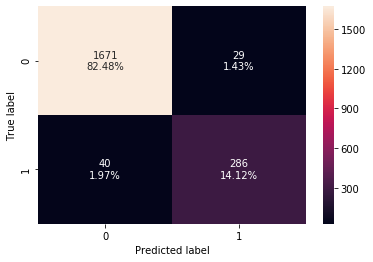

<IPython.core.display.Javascript object>

In [60]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

### XGBoost

In [61]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9682260596546313:
Wall time: 1min 15s


<IPython.core.display.Javascript object>

In [62]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=0,
    subsample=0.8,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=2,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [63]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.849,0.984,0.516,0.677


<IPython.core.display.Javascript object>

In [64]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.846,0.966,0.512,0.670


<IPython.core.display.Javascript object>

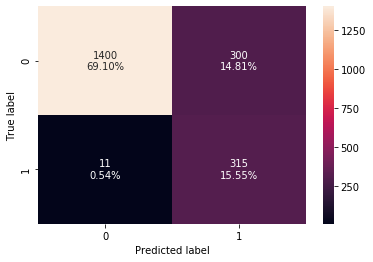

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

### Gradient Boost

In [66]:
# Choose the type of classifier.
model = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
param_grid = {
    "n_estimators": np.arange(50, 150, 50),
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "subsample": [0.8, 0.9, 1],
    "max_depth": np.arange(1, 5, 1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        gbc_tuned2.best_params_, gbc_tuned2.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2} with CV score=0.8555102040816326:


<IPython.core.display.Javascript object>

In [67]:
# building model with best parameters
gbc_tuned2 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.2,
    subsample=0.8,
    max_depth=4,
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, subsample=0.8)

<IPython.core.display.Javascript object>

In [68]:
# Calculating different metrics on train set
gbc_random_train = model_performance_classification_sklearn(
    gbc_tuned2, X_train, y_train
)
print("Training performance:")
gbc_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997,0.988,0.995,0.991


<IPython.core.display.Javascript object>

In [69]:
# Calculating different metrics on validation set
gbc_random_val = model_performance_classification_sklearn(gbc_tuned2, X_val, y_val)
print("Validation performance:")
gbc_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.972,0.887,0.935,0.910


<IPython.core.display.Javascript object>

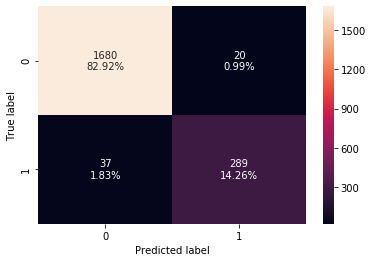

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned2, X_val, y_val)

### Class Balancing Function

In [71]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def BALANCE_DATA(X_train, y_train, choice):
    
    if choice==1:
        sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
        
    elif choice==2:
        sm = RandomUnderSampler(random_state=1)

    
    #Class balancing technique depending on the choice

    X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
    
    return X_train_over, y_train_over


<IPython.core.display.Javascript object>

In [72]:
def Model_Creation(CHOICE):
    
    models = []  # Empty list to store all the models

    #--------------------------Appending models into the list--------------------------

    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models


    #--------------------------loop through all models to get the mean cross validated score--------------------------
    print("\n" "Cross-Validation Performance:" "\n")

    for name, model in models:

        scoring = "recall" #Scoring parameter for K Fold CV
        
        # Stratified K Fold Cross Validation

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

        cv_result=[]

        for train_ix, test_ix in kfold.split(X_temp, y_temp):
            
            #Separate the training and validation data out

            X_train, X_val = X_temp.iloc[train_ix], X_temp.iloc[test_ix]
            y_train, y_val = y_temp.iloc[train_ix], y_temp.iloc[test_ix]
            
            #train_x and train_y are data from k-1 folds

            X_train_un, y_train_un = BALANCE_DATA(X_train, y_train, CHOICE)


            model.fit(X_train_un, y_train_un)

            y_pred=model.predict(X_val) #Left out fold

            recall_val=recall_score(y_val,y_pred)

            cv_result.append(recall_val)



        results.append(cv_result)

        names.append(name)

        print("Model {}: using Class Balancing + Stratified Cross Validation produces average Recall {}".format(name,\
                                                                                                      np.mean(cv_result) * 100))
        
    return results, names


<IPython.core.display.Javascript object>

#### Synthetic Minority Oversampling Technique

In [73]:
results_SMOTE, names_SMOTE = Model_Creation(1)


Cross-Validation Performance:

Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 89.47951665193044
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 86.9437076333628
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 89.55496610669023


<IPython.core.display.Javascript object>

#### Random Under Sampling

In [74]:
results_RUS, names_RUS = Model_Creation(2)


Cross-Validation Performance:

Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 95.23990568818157
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 93.39610963748895
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 95.23931623931624


<IPython.core.display.Javascript object>

#### Visualize Cross Validation Result

In [75]:
results_RUS

[[0.9501915708812261,
  0.9692307692307692,
  0.9576923076923077,
  0.9538461538461539,
  0.9310344827586207],
 [0.9386973180076629,
  0.9384615384615385,
  0.9384615384615385,
  0.9423076923076923,
  0.9118773946360154],
 [0.9655172413793104,
  0.9769230769230769,
  0.95,
  0.9461538461538461,
  0.9233716475095786]]

<IPython.core.display.Javascript object>

In [76]:
RUS = results_RUS[2]

print(RUS)

print(np.median(RUS))

[0.9655172413793104, 0.9769230769230769, 0.95, 0.9461538461538461, 0.9233716475095786]
0.95


<IPython.core.display.Javascript object>

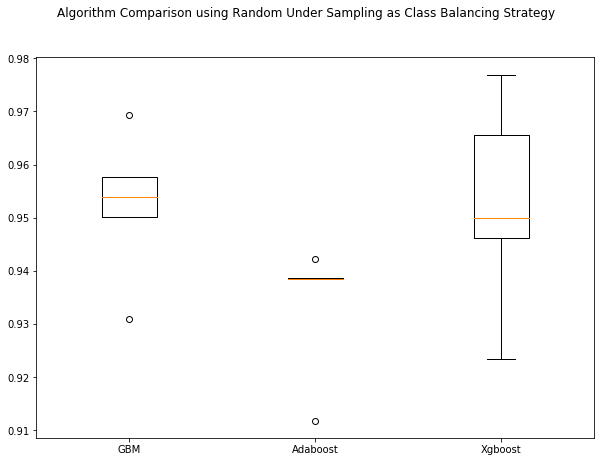

<IPython.core.display.Javascript object>

In [77]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle(
    "Algorithm Comparison using Random Under Sampling as Class Balancing Strategy"
)
ax = fig.add_subplot(111)

plt.boxplot(results_RUS)
ax.set_xticklabels(names_RUS)

plt.show()

In [78]:
# Performance comparison

comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Bagging",
            "Random Forest",
            "Gradient Boost Model",
            "Adaboost",
            "XGBoost",
            "Decision Tree",
            "Logistic Regression",
            "Adaboost Hypertuned",
            "XGB Hypertuned",
            "GBM Hypertuned",
        ],
        "Training Performance": [
            0.796,
            0.757,
            0.817,
            0.817,
            0.868,
            0.776,
            0.427,
            0.987,
            0.984,
            0.986,
        ],
        "Validation Performance": [
            0.788,
            0.813,
            0.865,
            0.859,
            0.877,
            0.810,
            0.540,
            0.877,
            0.966,
            0.896,
        ],
    }
)
comparison_frame

,Model,Training Performance,Validation Performance
0,Bagging,0.796,0.788
1,Random Forest,0.757,0.813
2,Gradient Boost Model,0.817,0.865
3,Adaboost,0.817,0.859
4,XGBoost,0.868,0.877
5,Decision Tree,0.776,0.810
6,Logistic Regression,0.427,0.540
7,Adaboost Hypertuned,0.987,0.877
8,XGB Hypertuned,0.984,0.966
9,GBM Hypertuned,0.986,0.896


<IPython.core.display.Javascript object>

In [79]:
# Performance comparison

comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost SMOTE",
            "XGB SMOTE",
            "GBM SMOTE",
            "Adaboost Undersampling",
            "XGB Undersampling",
            "GBM Undersampling",
        ],
        "Cross-Validation Performance": [
            0.869,
            0.896,
            0.895,
            0.934,
            0.952,
            0.952,
        ],
    }
)
comparison_frame

,Model,Cross-Validation Performance
0,Adaboost SMOTE,0.869
1,XGB SMOTE,0.896
2,GBM SMOTE,0.895
3,Adaboost Undersampling,0.934
4,XGB Undersampling,0.952
5,GBM Undersampling,0.952


<IPython.core.display.Javascript object>

- Accross all the models, XGBoost Hypertuned has the best performance

### Performance on test

In [80]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.846,0.975,0.510,0.670


<IPython.core.display.Javascript object>

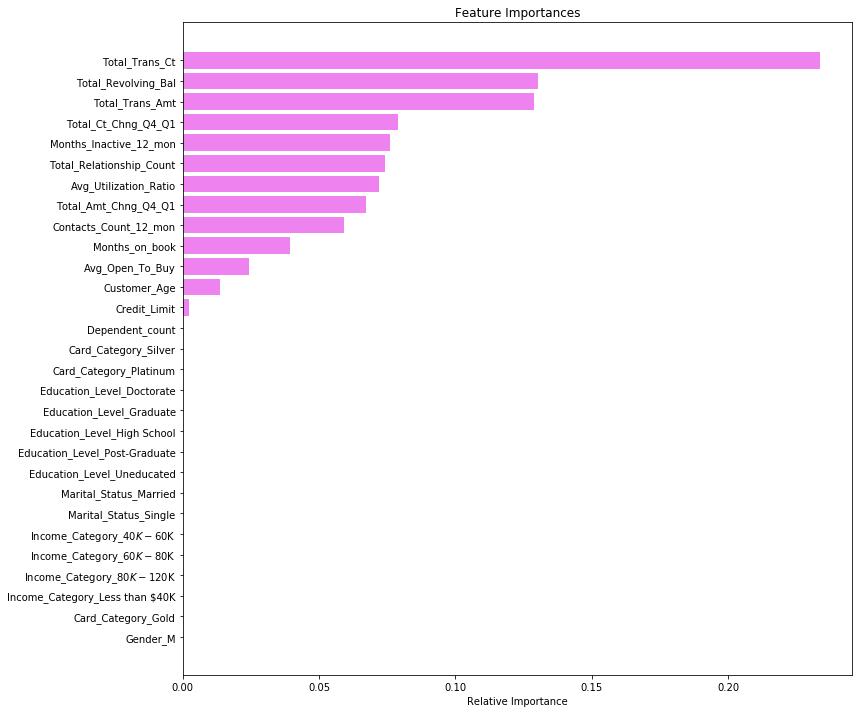

<IPython.core.display.Javascript object>

In [81]:
feature_names = X.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Ct, Total_Revolving and Total_Trans_Amt are the top 3 features from the chart above

### Pipelines

In [82]:
# creating a list of numerical variables
numerical_features = [
    'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [83]:
# Separating target variable and other variables
X = ccData.drop(columns="Attrition_Flag")
Y = ccData["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [84]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [85]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=0,
                subsample=0.8,
                learning_rate=0.1,
                eval_metric="logloss",
                max_depth=2,
                reg_lambda=10,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

<IPython.core.display.Javascript object>

In [86]:
# Calculating different metrics on validation set
xgboost_pipeline = model_performance_classification_sklearn(model, X_test, y_test)
print("Test performance:")
xgboost_pipeline

Test performance:


,Accuracy,Recall,Precision,F1
0,0.849,0.980,0.516,0.676


<IPython.core.display.Javascript object>

## Business Insights

- There are more female customers than male customers
- Most of the customers are graduates while the least numbers of customers have doctorate degrees
- Most of the customers are married while the least numbers of customers are divorced
- Most of the customers earn below $40k
- Most of the customers are on Blue category
- Credit_Limit is perfectly correlated to Avg_Open_To_Buy
- Month_on_book and Customer_Age are positively correleted
- Dependent_Count does not have an effect on the Attriction rate
- Marital status does not have an effect on the Attriction rate
- Income category does not have an effect on the Attriction rate
- Customers with a doctorate educational level have the least attrition rate
- Customers with platinum card holders have the least attrition rate

## Model conclusion
- XGBoost is the best model for the analysis
- Total_Trans_Ct, Total_Revolving and Total_Trans_Amt are the top 3 most important features

## Recommendations
- An investigation should be carried out on the customer service experience as the more contact with customers account for a higher attrition rate
- The bank should review the features of the platinum cards (possibly the charges) as this accounts for most of the attritions
- The Bank should consider using XGBoost Model to predict future attrition rates of customers